# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.1'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

C:\Users\Soo Whan Park\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
checkpoint_filepath = 'all/'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath,
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            save_weights_only=True,
                            mode='max')
    



vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape = (224,224,3))
vgg16.trainable = False
model = tf.keras.models.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu',name='feature_dense'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4,activation='softmax')
])
model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt,
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
feature_dense (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1

#### [5 points] Train Model

In [5]:
#FIT MODEL
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

history = model.fit(train_batches, epochs=100, validation_data=valid_batches,batch_size=5, 
                    steps_per_epoch=STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID, callbacks=[checkpoint])
model.load_weights(checkpoint_filepath)

C:\Users\Soo Whan Park\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Soo Whan Park\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 1.5610 - accuracy: 0.2524
Epoch 00001: val_accuracy improved from -inf to 0.32000, saving model to all\
21/21 [==============================] - 26s 1s/step - loss: 1.5610 - accuracy: 0.2524 - val_loss: 1.3423 - val_accuracy: 0.3200
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 1.4129 - accuracy: 0.3107
Epoch 00002: val_accuracy improved from 0.32000 to 0.40000, saving model to all\
21/21 [==============================] - 25s 1s/step - loss: 1.4129 - accuracy: 0.3107 - val_loss: 1.2928 - val_accuracy: 0.4000
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.3267 - accuracy: 0.3641
Epoch 00003: val_accuracy improved from 0.40000 to 0.44000, saving model to all\
21/21 [==============================] - 28s 1s/step - loss: 1.3267 - accuracy: 0.3641 - val_loss: 1.2041 - val_accuracy: 0.4400
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 1.2615 - accuracy: 

Epoch 30/100
21/21 [==============================] - ETA: 0s - loss: 0.7924 - accuracy: 0.6553
Epoch 00030: val_accuracy did not improve from 0.80000
21/21 [==============================] - 28s 1s/step - loss: 0.7924 - accuracy: 0.6553 - val_loss: 0.7185 - val_accuracy: 0.6600
Epoch 31/100
21/21 [==============================] - ETA: 0s - loss: 0.7509 - accuracy: 0.6748
Epoch 00031: val_accuracy did not improve from 0.80000
21/21 [==============================] - 28s 1s/step - loss: 0.7509 - accuracy: 0.6748 - val_loss: 0.6886 - val_accuracy: 0.6800
Epoch 32/100
21/21 [==============================] - ETA: 0s - loss: 0.7037 - accuracy: 0.7039
Epoch 00032: val_accuracy did not improve from 0.80000
21/21 [==============================] - 28s 1s/step - loss: 0.7037 - accuracy: 0.7039 - val_loss: 0.6757 - val_accuracy: 0.6600
Epoch 33/100
21/21 [==============================] - ETA: 0s - loss: 0.7847 - accuracy: 0.6942
Epoch 00033: val_accuracy did not improve from 0.80000
21/21 [==

21/21 [==============================] - ETA: 0s - loss: 0.7271 - accuracy: 0.6893
Epoch 00059: val_accuracy did not improve from 0.80000
21/21 [==============================] - 28s 1s/step - loss: 0.7271 - accuracy: 0.6893 - val_loss: 0.6838 - val_accuracy: 0.6400
Epoch 60/100
21/21 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.7233
Epoch 00060: val_accuracy did not improve from 0.80000
21/21 [==============================] - 29s 1s/step - loss: 0.7035 - accuracy: 0.7233 - val_loss: 0.6658 - val_accuracy: 0.6200
Epoch 61/100
21/21 [==============================] - ETA: 0s - loss: 0.6679 - accuracy: 0.7039
Epoch 00061: val_accuracy did not improve from 0.80000
21/21 [==============================] - 29s 1s/step - loss: 0.6679 - accuracy: 0.7039 - val_loss: 0.6277 - val_accuracy: 0.5600
Epoch 62/100
21/21 [==============================] - ETA: 0s - loss: 0.7097 - accuracy: 0.6845
Epoch 00062: val_accuracy did not improve from 0.80000
21/21 [===============

21/21 [==============================] - ETA: 0s - loss: 0.5799 - accuracy: 0.7330
Epoch 00088: val_accuracy did not improve from 0.80000
21/21 [==============================] - 28s 1s/step - loss: 0.5799 - accuracy: 0.7330 - val_loss: 0.5303 - val_accuracy: 0.7200
Epoch 89/100
21/21 [==============================] - ETA: 0s - loss: 0.6108 - accuracy: 0.7379
Epoch 00089: val_accuracy did not improve from 0.80000
21/21 [==============================] - 28s 1s/step - loss: 0.6108 - accuracy: 0.7379 - val_loss: 0.6738 - val_accuracy: 0.6600
Epoch 90/100
21/21 [==============================] - ETA: 0s - loss: 0.6271 - accuracy: 0.7524
Epoch 00090: val_accuracy did not improve from 0.80000
21/21 [==============================] - 28s 1s/step - loss: 0.6271 - accuracy: 0.7524 - val_loss: 0.6734 - val_accuracy: 0.6800
Epoch 91/100
21/21 [==============================] - ETA: 0s - loss: 0.6127 - accuracy: 0.7524
Epoch 00091: val_accuracy did not improve from 0.80000
21/21 [===============

#### [5 points] Plot Accuracy and Loss During Training

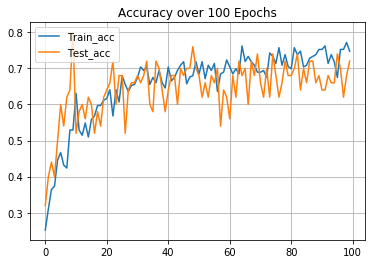

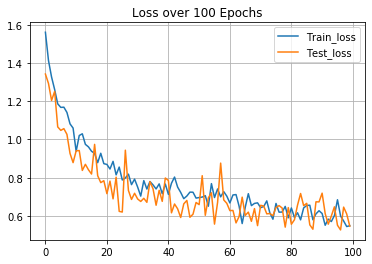

In [6]:
import matplotlib.pyplot as plt

plt.title('Accuracy over 100 Epochs')
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'Test_acc')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.title('Loss over 100 Epochs')
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'Test_loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### Testing Model

In [8]:
vgg16.trainable = True
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")
eval_generator.reset()
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36/36 [==============================] - 4s 108ms/step - loss: 1.1044 - accuracy: 0.5833
Test loss: 1.1044107675552368
Test accuracy: 0.5833333134651184


Found 270 images belonging to 4 classes.


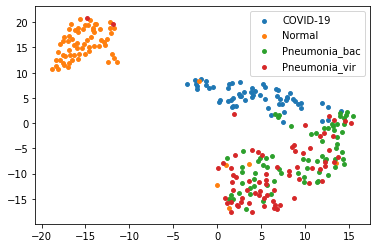

In [44]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")


#get labels from data generator
labels_array = []
num_labels=[]
a = tsne_eval_generator.class_indices.keys()
for i in range( tsne_eval_generator.__len__() ):
    labels_array.extend(tsne_eval_generator.__getitem__( i )[1] )   #obtain the arrays of index to array
    for j in range(len(labels_array[i])):       #obtain the index of item that is equal to 1, and append to the list 
        if labels_array[i][j] == 1.0:
            num_labels.append(j)

#feature extraction    
tsne_eval_generator.reset()
features = intermediate_layer_model.predict(tsne_eval_generator)

#compress the dimensionality    
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(features)
x=[i[0] for i in tsne_result]
y=[i[1] for i in tsne_result]

#plotting values
zero_x=[]
one_x=[]
two_x=[]
three_x=[]

zero_y=[]
one_y=[]
two_y=[]
three_y=[]

for i in range(len(labels_array)):
    if num_labels[i] == 0:
        zero_x.append(x[i])
        zero_y.append(y[i])
    elif num_labels[i] == 1:
        one_x.append(x[i])
        one_y.append(y[i])
    elif num_labels[i] == 2:
        two_x.append(x[i])
        two_y.append(y[i])
    elif num_labels[i] == 3:
        three_x.append(x[i])
        three_y.append(y[i])
        
        
#plotting
plt.scatter(zero_x,zero_y, label='COVID-19', s=15)
plt.scatter(one_x,one_y, label='Normal', s=15)
plt.scatter(two_x,two_y, label='Pneumonia_bac', s=15)
plt.scatter(three_x,three_y, label='Pneumonia_vir', s=15)
plt.legend(loc='upper right')
plt.show()

## Model 2 

In [39]:
#checkpoint_filepath3 = 'all/'
#checkpoint3 = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath2,
#                            monitor='val_accuracy',
#                            verbose=1,
#                            save_best_only=True,
#                            save_weights_only=True,
#                            mode='max')
    

mobile = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape = (224,224,3))
mobile_model3 = tf.keras.models.Sequential([
    mobile,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu',name='feature_dense'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4,activation='softmax')
])
mobile_model3.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
mobile_model3.compile(optimizer=opt,
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_11 (Flatten)         (None, 50176)             0         
_________________________________________________________________
feature_dense (Dense)        (None, 256)               12845312  
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 1028      
Total params: 16,075,204
Trainable params: 16,053,316
Non-trainable params: 21,888
_________________________________________________________________


In [40]:
history = mobile_model3.fit(train_batches, epochs=100, validation_data=valid_batches, batch_size=BATCH_SIZE, 
                    steps_per_epoch=STEP_SIZE_TRAIN, validation_steps = STEP_SIZE_VALID)#, callbacks=[checkpoint3])
#mobile_model3.load_weights(checkpoint_filepath3)

Epoch 1/100
21/21 [==============================] - 29s 1s/step - loss: 3.5027 - accuracy: 0.3495 - val_loss: 2.7347 - val_accuracy: 0.3600
Epoch 2/100
21/21 [==============================] - 28s 1s/step - loss: 2.2274 - accuracy: 0.4806 - val_loss: 3.4575 - val_accuracy: 0.2600
Epoch 3/100
21/21 [==============================] - 28s 1s/step - loss: 1.3797 - accuracy: 0.5922 - val_loss: 2.8978 - val_accuracy: 0.3200
Epoch 4/100
21/21 [==============================] - 29s 1s/step - loss: 1.2921 - accuracy: 0.6019 - val_loss: 1.4403 - val_accuracy: 0.5200
Epoch 5/100
21/21 [==============================] - 28s 1s/step - loss: 0.9724 - accuracy: 0.6262 - val_loss: 1.2639 - val_accuracy: 0.4200
Epoch 6/100
21/21 [==============================] - 28s 1s/step - loss: 0.7415 - accuracy: 0.6845 - val_loss: 2.1276 - val_accuracy: 0.3600
Epoch 7/100
21/21 [==============================] - 28s 1s/step - loss: 0.7294 - accuracy: 0.6796 - val_loss: 1.7721 - val_accuracy: 0.3600
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 28s 1s/step - loss: 0.3122 - accuracy: 0.8398 - val_loss: 0.4289 - val_accuracy: 0.8400
Epoch 60/100
21/21 [==============================] - 28s 1s/step - loss: 0.4149 - accuracy: 0.8204 - val_loss: 0.3172 - val_accuracy: 0.8600
Epoch 61/100
21/21 [==============================] - 28s 1s/step - loss: 0.3987 - accuracy: 0.8301 - val_loss: 0.3908 - val_accuracy: 0.7600
Epoch 62/100
21/21 [==============================] - 28s 1s/step - loss: 0.3733 - accuracy: 0.8204 - val_loss: 0.3698 - val_accuracy: 0.8400
Epoch 63/100
21/21 [==============================] - 28s 1s/step - loss: 0.4872 - accuracy: 0.7961 - val_loss: 0.3237 - val_accuracy: 0.7600
Epoch 64/100
21/21 [==============================] - 28s 1s/step - loss: 0.4062 - accuracy: 0.8786 - val_loss: 0.4876 - val_accuracy: 0.7400
Epoch 65/100
21/21 [==============================] - 28s 1s/step - loss: 0.4341 - accuracy: 0.8204 - val_loss: 0.4551 - val_accuracy: 0.8000
Epoch 

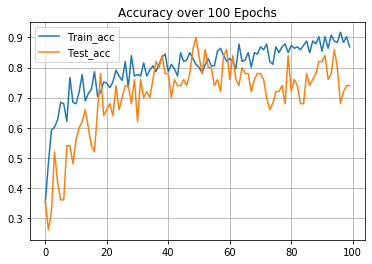

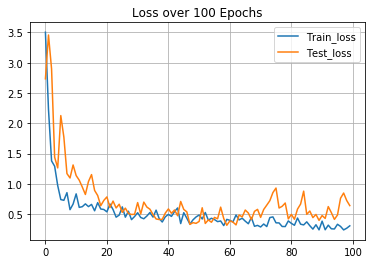

In [41]:
plt.title('Accuracy over 100 Epochs')
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label = 'Test_acc')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

plt.title('Loss over 100 Epochs')
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'Test_loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [42]:
#vgg16.trainable = True
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
x = mobile_model3.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36/36 [==============================] - 1s 40ms/step - loss: 1.6443 - accuracy: 0.6667
Test loss: 1.6442677974700928
Test accuracy: 0.6666666865348816


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}
Extracting features for 270 images.
270/270 [==============================] - 71s 265ms/step
Training TSNE model.


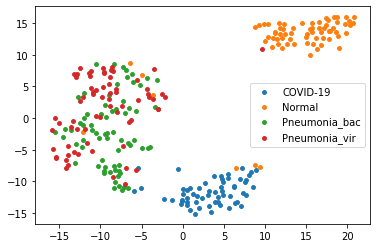

In [15]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=model.input,
                                        outputs=model.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")


#get labels from data generator
labels_array = []
num_labels=[]
a = tsne_eval_generator.class_indices.keys()
for i in range( tsne_eval_generator.__len__() ):
    labels_array.extend(tsne_eval_generator.__getitem__( i )[1] )   #obtain the arrays of index to array
    for j in range(len(labels_array[i])):       #obtain the index of item that is equal to 1, and append to the list 
        if labels_array[i][j] == 1.0:
            num_labels.append(j)

#feature extraction    
tsne_eval_generator.reset()
features = intermediate_layer_model.predict(tsne_eval_generator)

#compress the dimensionality    
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(features)
x=[i[0] for i in tsne_result]
y=[i[1] for i in tsne_result]

#plotting values
zero_x=[]
one_x=[]
two_x=[]
three_x=[]

zero_y=[]
one_y=[]
two_y=[]
three_y=[]

for i in range(len(labels_array)):
    if num_labels[i] == 0:
        zero_x.append(x[i])
        zero_y.append(y[i])
    elif num_labels[i] == 1:
        one_x.append(x[i])
        one_y.append(y[i])
    elif num_labels[i] == 2:
        two_x.append(x[i])
        two_y.append(y[i])
    elif num_labels[i] == 3:
        three_x.append(x[i])
        three_y.append(y[i])
        
        
#plotting
plt.scatter(zero_x,zero_y, label='COVID-19', s=15)
plt.scatter(one_x,one_y, label='Normal', s=15)
plt.scatter(two_x,two_y, label='Pneumonia_bac', s=15)
plt.scatter(three_x,three_y, label='Pneumonia_vir', s=15)
plt.legend(loc='upper right')
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->